#### This is a simple Logistic Regression practice following Datacamp course. 
Good to be used as a quick review or for beginners with basic statistics knowledge. It covers the basic but key concepts concisely and shows how to implement with Python sklearn package.

In [87]:
# import required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline

In [5]:
data = pd.read_csv("diabetes.csv").dropna()
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


#### Split Data
Define predictors and lable
Split raw dataset to train and test sets (3:1)

In [40]:
features = list(data.columns)[:-1]
X =data[features]
y = data.Outcome

In [29]:
# Train:Test = 3：1 （75%：25%）
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

#### Train Model and Make Prediction
Train Logistic Regression Model with train dataset and predict using predictors test dataset

In [36]:
logitReg = LogisticRegression()
logitReg.fit(X_train,y_train)
y_pred=logitReg.predict(X_test)

#### Evaluation with Confusion Matrix
Diagonal values represent accurate predictions, non-diagonal elements are inaccurate predictions.

Visualized the confusion matrix using Heatmap.

In [42]:
# Model Evaluation using Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",cnf_matrix)

Confusion Matrix:
 [[119  11]
 [ 26  36]]


Text(0.5, 257.44, 'Predicted label')

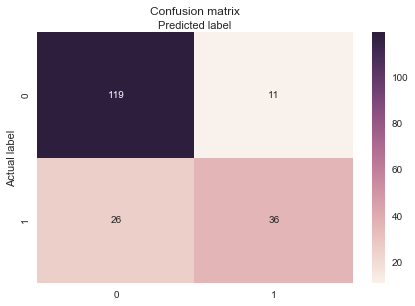

In [68]:
# Visualizing Confusion Matrix
labels=[0,1]
fig,ax=plt.subplots()
tick = np.arange(len(labels))
plt.xticks(tick,labels)
plt.yticks(tick,labels)

sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion matrix")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [69]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8072916666666666
Precision: 0.7659574468085106
Recall: 0.5806451612903226


#### ROC Curve
Roc(Receiver Operationg Characteristic) Curve 
ROC curve is a plot of the TP(true positive) rate against the FP(false positive) rate.
It shows the tradeoff between sensitivity and specificity.

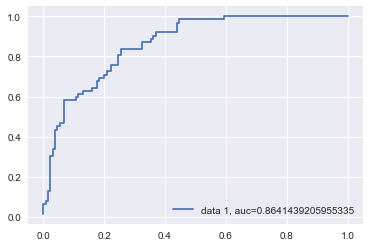

In [85]:
# ROC Curve
y_pred_proba = logitReg.predict_proba(X_test)[:,1]
fpr,tpr,_=metrics.roc_curve(y_test,y_pred_proba)
auc = metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()